In [1]:
import pandas as pd

In [6]:
#read the csv file
data=pd.read_csv(r"E:\Projects\covid-19.csv")

In [8]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [10]:
#Shape of the Dataset
data.shape

(321, 6)

In [12]:
data.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [14]:
#Missing values
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

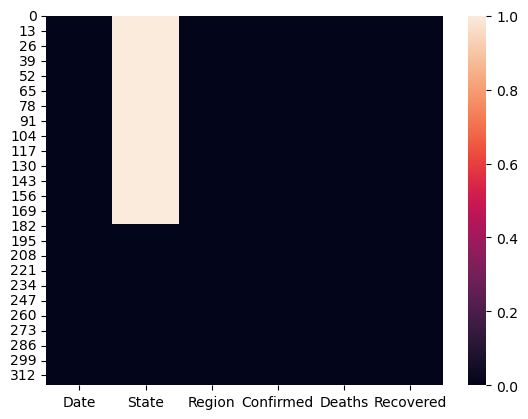

In [20]:
#Showing null values using heatmap
sns.heatmap(data.isnull())
plt.show()

### found 181 missing values in state column

## Handling Missing values

__Fill with Mode (Common values)__

In [27]:
mode_value = data['State'].mode()[0]
data['State'].fillna(mode_value, inplace=True)

In [29]:
#check
data.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [31]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Diamond Princess cruise ship,Afghanistan,1939,60,252
1,4/29/2020,Diamond Princess cruise ship,Albania,766,30,455
2,4/29/2020,Diamond Princess cruise ship,Algeria,3848,444,1702
3,4/29/2020,Diamond Princess cruise ship,Andorra,743,42,423
4,4/29/2020,Diamond Princess cruise ship,Angola,27,2,7


In [33]:
data['Region'].value_counts()

Region
US                58
Mainland China    31
Canada            15
France            11
UK                11
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Macau              1
Name: count, Length: 187, dtype: int64

In [35]:
data[['Region','Confirmed','Deaths','Recovered']].groupby('Region').sum()

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
...,...,...,...
West Bank and Gaza,344,2,71
Western Sahara,6,0,5
Yemen,6,0,1


In [113]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

## Retrieving the data of India :

In [37]:
data[data['Region'].isin(['India'])]

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,Diamond Princess cruise ship,India,33062,1079,8437


## Records of Zero deaths  :

In [39]:
data[data['Deaths']==0]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,Diamond Princess cruise ship,Bhutan,7,0,5
29,4/29/2020,Diamond Princess cruise ship,Cambodia,122,0,119
31,4/29/2020,Diamond Princess cruise ship,Central African Republic,50,0,10
45,4/29/2020,Diamond Princess cruise ship,Dominica,16,0,13
51,4/29/2020,Diamond Princess cruise ship,Eritrea,39,0,19
55,4/29/2020,Diamond Princess cruise ship,Fiji,18,0,12
64,4/29/2020,Diamond Princess cruise ship,Grenada,20,0,13
70,4/29/2020,Diamond Princess cruise ship,Holy See,10,0,2
90,4/29/2020,Diamond Princess cruise ship,Laos,19,0,7
99,4/29/2020,Diamond Princess cruise ship,Madagascar,128,0,90


In [41]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,Diamond Princess cruise ship,Afghanistan,1939,60,252
1,4/29/2020,Diamond Princess cruise ship,Albania,766,30,455
2,4/29/2020,Diamond Princess cruise ship,Algeria,3848,444,1702
3,4/29/2020,Diamond Princess cruise ship,Andorra,743,42,423
4,4/29/2020,Diamond Princess cruise ship,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


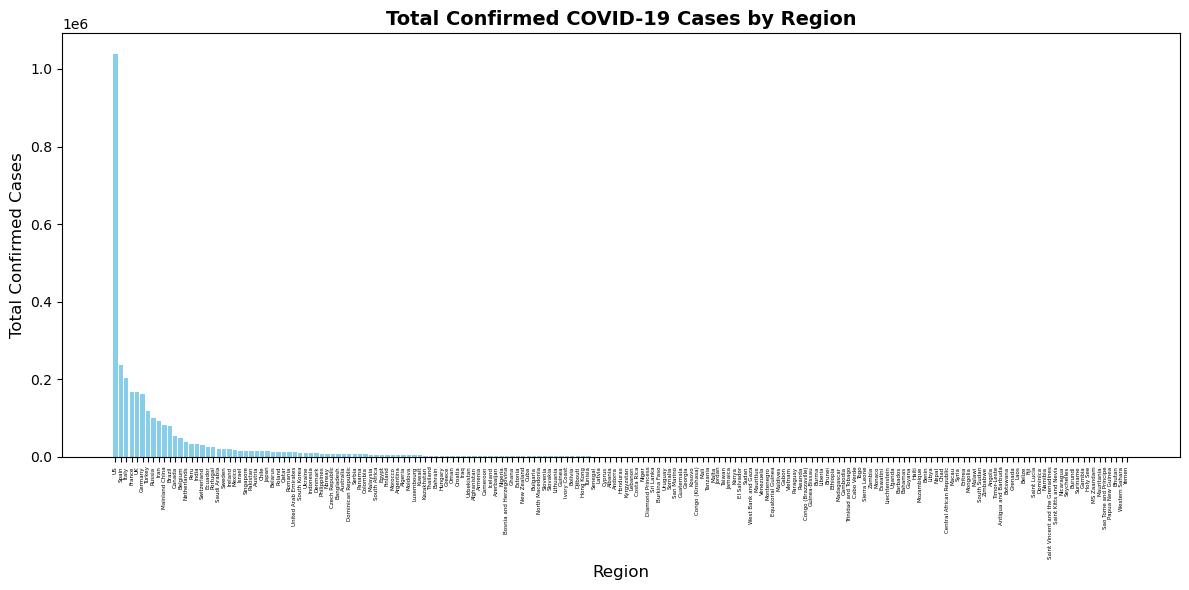

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

region_data = data.groupby('Region')[['Confirmed']].sum().sort_values('Confirmed', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12,6))
plt.bar(region_data.index, region_data['Confirmed'], color='skyblue')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Confirmed Cases', fontsize=12)
plt.title('Total Confirmed COVID-19 Cases by Region', fontsize=14, weight='bold')
plt.xticks(rotation=90,fontsize=4)
plt.tight_layout()
plt.show()


Q)Removing all records where confirmed cases less that 10 : 

In [115]:
data=data[~(data.Confirmed<10)]

### Q)To find in which Region Maximum Confirmed Cases were Found :

In [132]:
data.groupby('Region').Confirmed.sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

### Q)In which Region minimum number of Deaths were Recorded 

In [155]:
data.groupby('Region').Deaths.sum().sort_values(ascending=True).head(50)

Region
Cambodia                            0
Seychelles                          0
Saint Lucia                         0
Central African Republic            0
Saint Kitts and Nevis               0
South Sudan                         0
Rwanda                              0
Grenada                             0
Macau                               0
Madagascar                          0
Nepal                               0
Namibia                             0
Saint Vincent and the Grenadines    0
Mozambique                          0
Holy See                            0
Timor-Leste                         0
Mongolia                            0
Uganda                              0
Laos                                0
Eritrea                             0
Vietnam                             0
Fiji                                0
Dominica                            0
Gambia                              1
Equatorial Guinea                   1
Eswatini                            1
Cabo 

### Q) How many Deaths, Confirmed , Recovered Cases were reported from India till April 29 April 2020

In [162]:
data[data.Region=='India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,Diamond Princess cruise ship,India,33062,1079,8437


### Q) Sort the entire data wrt Confirmed Cases in asc order

In [178]:
data.sort_values(by=['Confirmed'],ascending=True).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,Diamond Princess cruise ship,Suriname,10,1,8
70,4/29/2020,Diamond Princess cruise ship,Holy See,10,0,2
59,4/29/2020,Diamond Princess cruise ship,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,Diamond Princess cruise ship,Seychelles,11,0,6
27,4/29/2020,Diamond Princess cruise ship,Burundi,11,1,4
306,4/29/2020,Turks and Caicos Islands,UK,12,1,5
118,4/29/2020,Diamond Princess cruise ship,Nicaragua,13,3,7


### Q) Sort the entire data wrt Recovered Cases in des order

In [174]:
data.sort_values(by=['Recovered'],ascending=False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,Diamond Princess cruise ship,Spain,236899,24275,132929
61,4/29/2020,Diamond Princess cruise ship,Germany,161539,6467,120400
76,4/29/2020,Diamond Princess cruise ship,Iran,93657,5957,73791
80,4/29/2020,Diamond Princess cruise ship,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,Diamond Princess cruise ship,France,165093,24087,48228
167,4/29/2020,Diamond Princess cruise ship,Turkey,117589,3081,44040
22,4/29/2020,Diamond Princess cruise ship,Brazil,79685,5513,34132
158,4/29/2020,Diamond Princess cruise ship,Switzerland,29407,1716,22600
78,4/29/2020,Diamond Princess cruise ship,Ireland,20253,1190,13386
